<a href="https://colab.research.google.com/github/Avit-hodibu/Recurrent_Neural_Network/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Recurrent NN**: it is a type of sequential model to work on sequential data.

For example : if we are writting text then sequence matter. Hi, my name is Nitesh cannot be same as Nitesh Hi, my is name. We read text by text and retain the context and by adding it we gain meaning. This is an example of sequential data.

Sequential data: any text data, time series data, speech data and DNA sequence. It is where sequence matter.

NLP use RNN mostly.

**Why RNN are needed?**

if we use ANN for sequence data, we have three problems:
1. text input -> varying size
2. zero padding -> unnecessary computation
3. prediction problem
4. totally disregarding the sequence information

That is why we need RNN to solve sequence data

1. sequence data can be of any length but, ANN is fixed input size
2. sequence contain some meaning but in ANN we lose sequence order




RNN application:

- sentence completetion
- give a caption of image
- translation
- summary of text
- question and answer

# RNN Architecture

Data for RNN: data shape for each data is(timesteps, input_features)

for example:

|----------Review----------|sentiment|

movie was good -----| 1

movie was bad--------| 0

movie was not good| 0

we have three data about movie review. It is positive(1) or negative(0)

we have 5 vocab we assign 5 number representation: movie[10000], was[01000], good[00100], bad[00010] and not[00001].

If i have to represent particular review in vectorized form then:

movie was good = [[10000],[01000], [00100]] => (timesteps, input_features) = (3,5)

3 represent number of timesteps(3 words so, 3 timesteps). 5 is number of input features(5 vocab)

movie was not good = [[10000],[01000], [00001], [00100]] => (timesteps, input_features) = (4,5)

When we use Keras and there is simpleRNN form (batch_size, timesteps, input_features) -> 3D tensor



**How RNN works?**

|----------------------------Review(X)----------------------------|sentiment(Y)|

X1=movie(X11) was(X12) good(X13)-------------| 1

X2=movie(X21) was(X22) bad(X23)----------------| 0

X3=movie(X31) was(X32) not(X33) good(X34)| 0

we have three data about movie review. It is positive(1) or negative(0)

we have 5 vocab we assign 5 number representation: movie[10000], was[01000], good[00100], bad[00010] and not[00001].


In ANN: input --> hidden --> output

In RNN: input --> hidden --> output

but has two major difference:
- In RNN, data feed in the network. You pick 1st data and you send to RNN network. What we do is we send input basis on time. At time(t) = 1, we send 1st input X1. At time(t) = 2, we send 2nd input X2. At time(t) = 3, we send 3rd input X3.

- In ANN, it is feed forward that means information only move forward (input to output). But, RNN is not. In RNN there is concept of state. So, what happen is the hidden layer send feedback to hidden layer. This create major difference. Feedback make RNN what RNN is.








5 vocab means 5 input node. in hidden 3 node it works as fully connected. in hidden each node output become it's own input and other node of hidden layer again(feedback).

t=1 we send X1's X11. it have feedback node all zero or random number to hidden layer.

t=2 we send X1's X12. it have feedback from X11 hidden node output

t=3 we send X1's X13. it have feedback from X13 hidden node output

weights: 5 vocab input mean 5 weights to each node. 3 hidden node mean (5,3). in feedback each node in hidden has to send feedback each hidden node (3,3). at output layer single node (3,1)

15+9+3= 27 weights

each node has biases= 4

In [ ]:
from keras import Sequential
from keras.layers import SimpleRNN, Dense

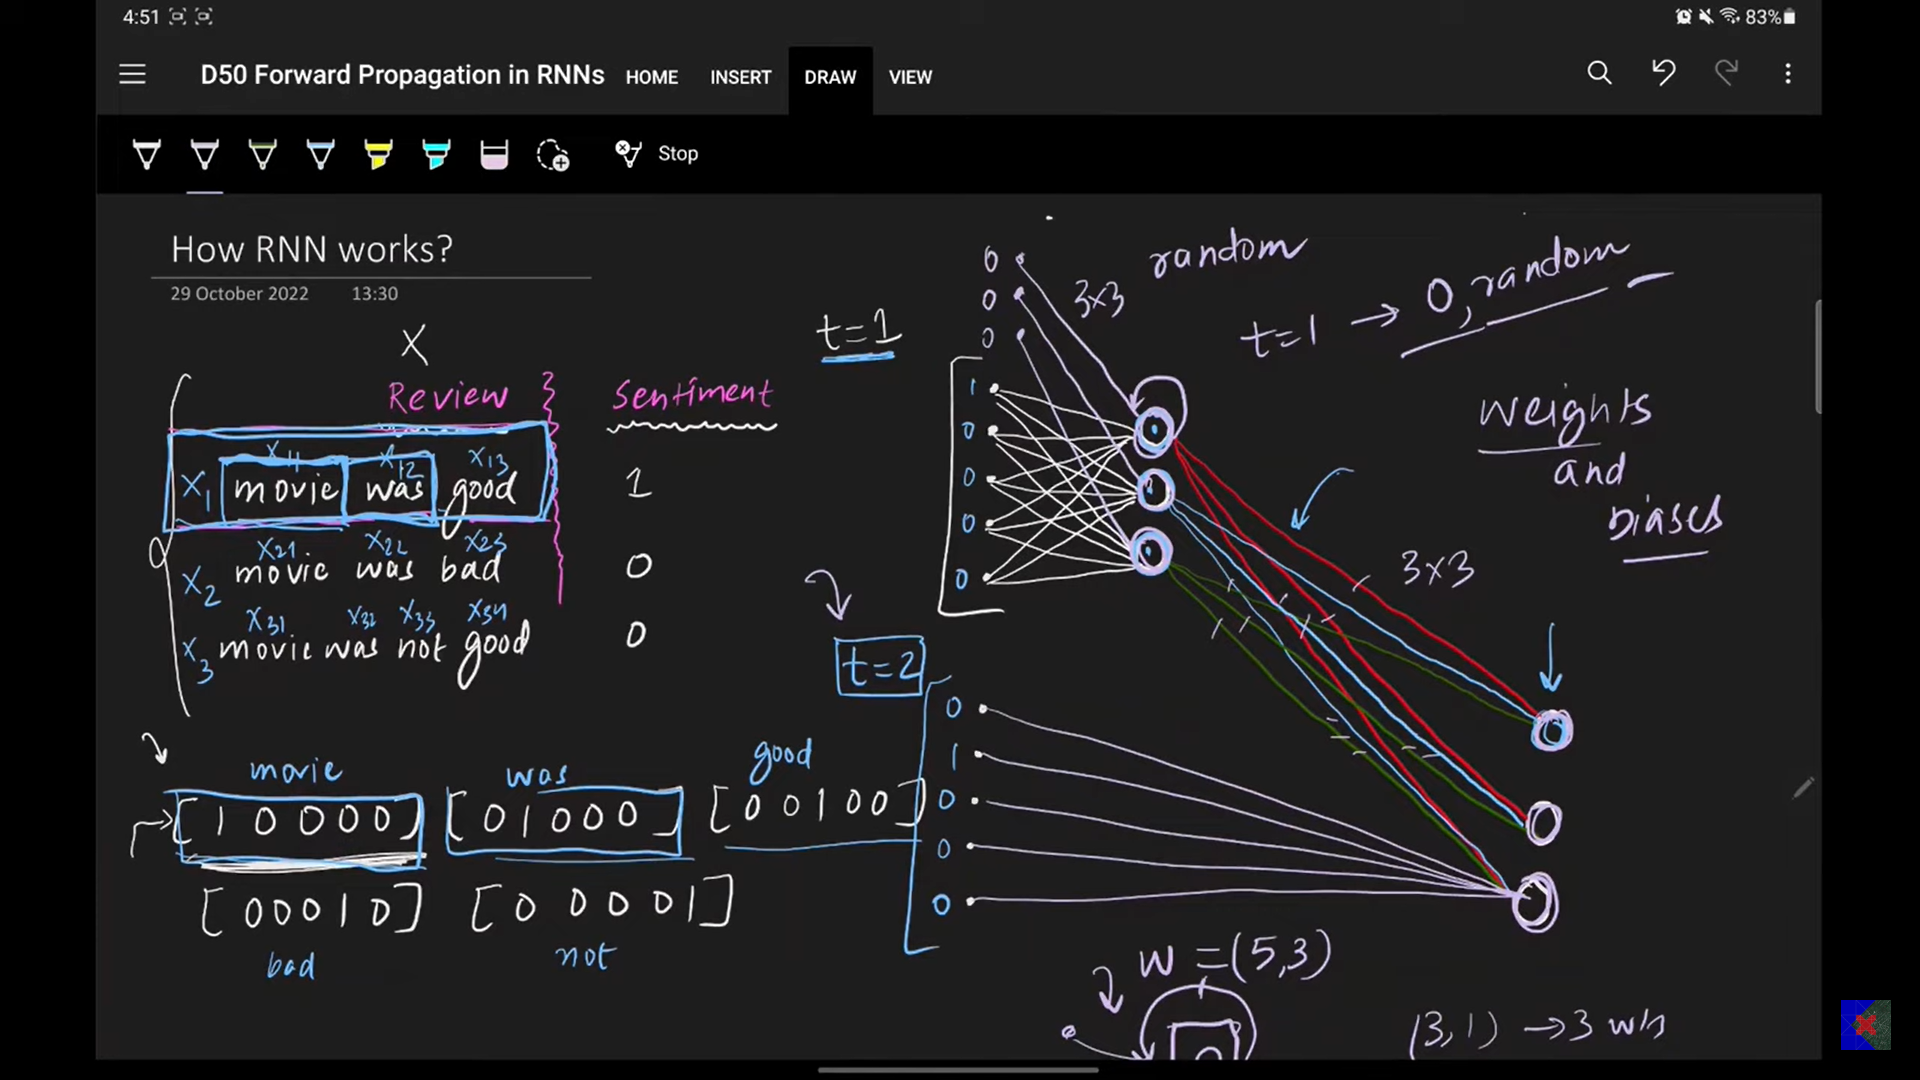

In [ ]:
model = Sequential()
model.add(SimpleRNN(3, input_shape=(4,5))) # timestamp max =4 and input=5
model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 3)                   │              27 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(model.get_weights()[0].shape) # hidden weight
print(model.get_weights()[0])

(5, 3)
[[-0.6336472   0.33537692 -0.22826374]
 [-0.35152507  0.84374756 -0.20407581]
 [ 0.04779083  0.70060235  0.7198605 ]
 [ 0.3708505   0.14594573 -0.80285245]
 [-0.13863188  0.22237116  0.605529  ]]


In [ ]:
print(model.get_weights()[1].shape) #feed back weight
print(model.get_weights()[1])

(3, 3)
[[-0.927143    0.22113805  0.30249622]
 [-0.34680238 -0.81211853 -0.46924582]
 [ 0.14189468 -0.5399644   0.82964116]]


In [ ]:
print(model.get_weights()[2].shape) # hidden bias
print(model.get_weights()[2])

(3,)
[0. 0. 0.]


In [ ]:
print(model.get_weights()[3].shape) # output weight
print(model.get_weights()[3])

(3, 1)
[[ 1.010063  ]
 [ 0.42651522]
 [-0.3436489 ]]


In [ ]:
print(model.get_weights()[4].shape) #output bias
print(model.get_weights()[4])

(1,)
[0.]


# Forward Prop

X11= vector with 5D

these will be send one by one in the recurrent NN.

During forward propagation we use one concept that is called unfolding through time. The recurrent layer will act as loop.

t=1 we send first word.

It will calculate as ANN the. When input is given then it will calcaulate with weight dot product. That is X11.Wi thid will give (1,3).each node has activition function. then the put activation funtion f(X11Wi + b1) which will give O1(1,3)

t=2. we use same with network with same weight. X12 and and Wi plus we have O1 and Wh also . We will have calculation X12Wi + O1Wh + b1 this will send to activation function f(X12Wi + O1Wh + b) this will give O2(1,3).

Again t=3. X13 will be send and happen same thing. We will have f(X13Wi + O2Wh + b) give O3(1,3).

Since the word has finish we move. We have O3 which will do dot product with weight of another passing layer and add bias. f(O3Wi + b) with activation function . this will give output.

To make consistent we have O0 given during t=1 where O0 is random number.f(X11Wi + O0Wh + b1)

We called it recurrent because the hidden layer reappeared for each word. Here parameter sharing or weight sharing concept is use. We are processing in sequence


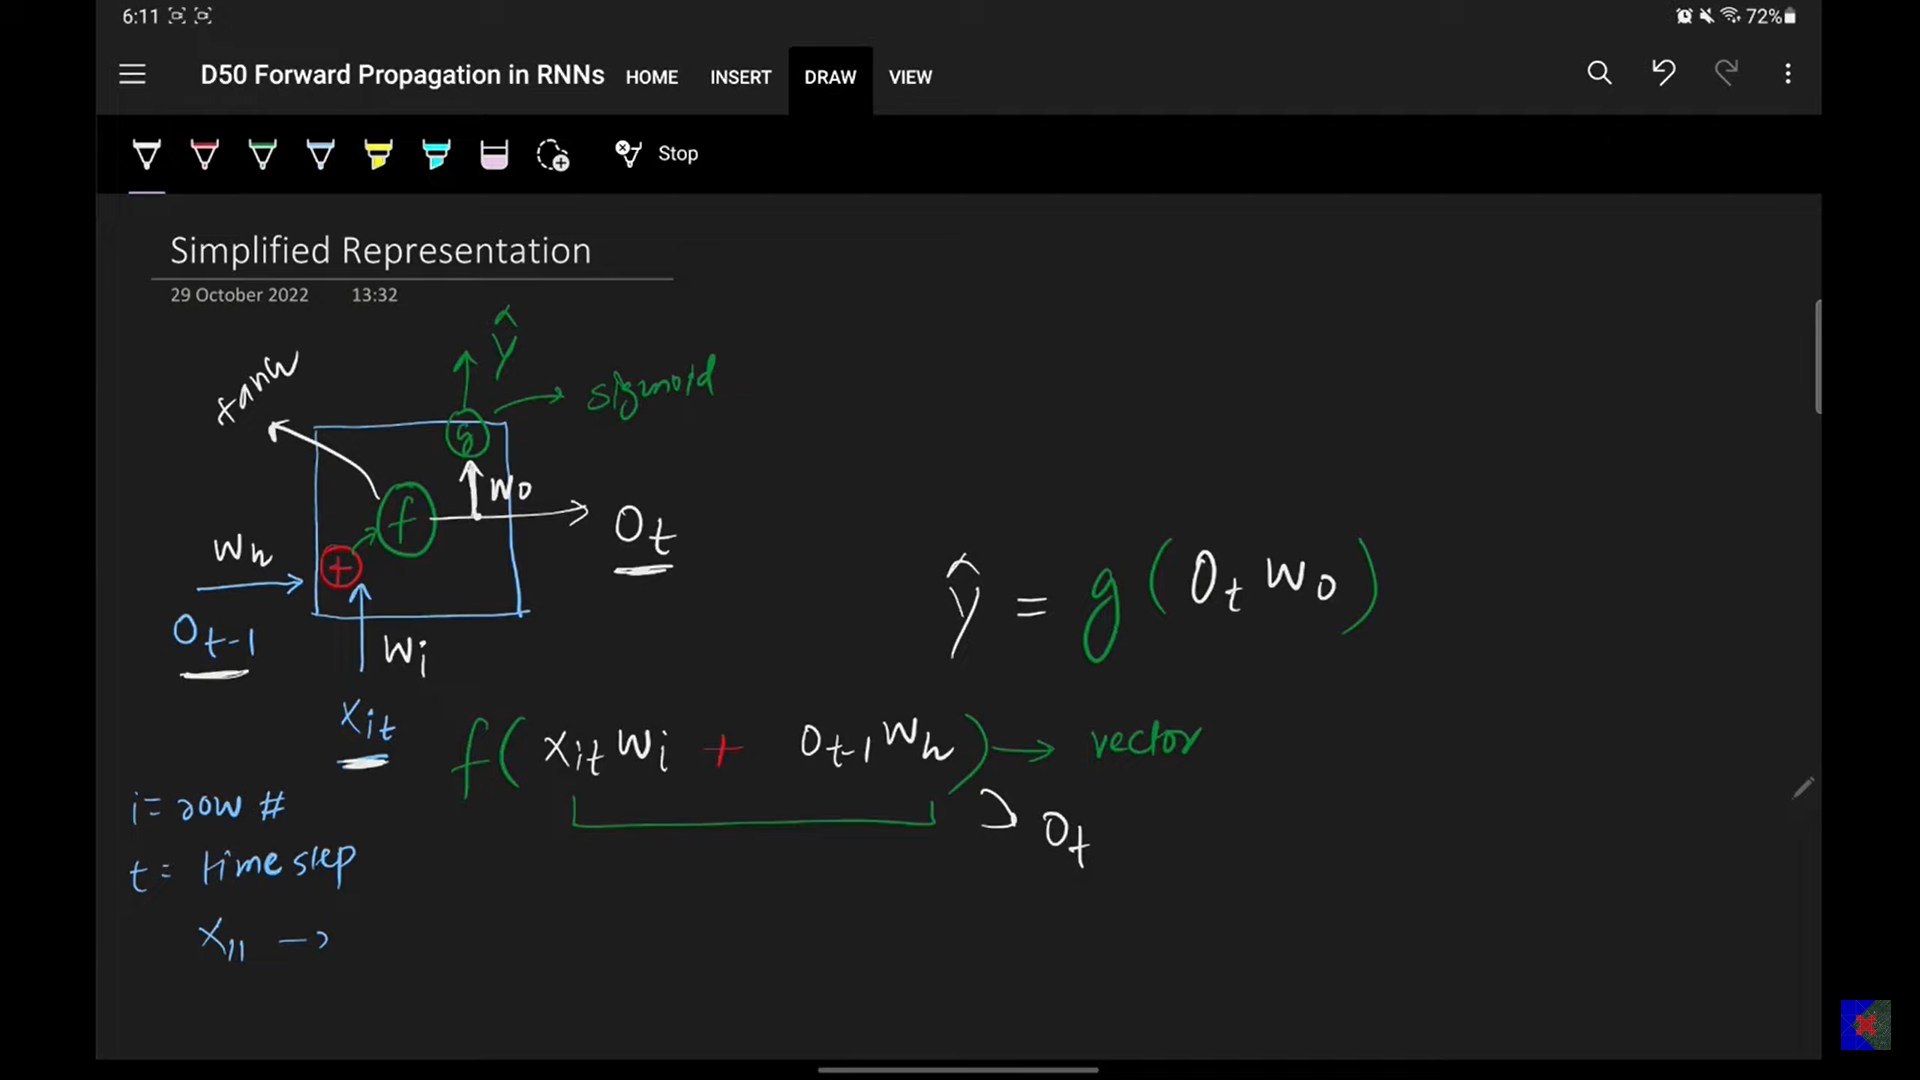

If it is the last then it will go throught the W0 and have do the activation function and give Yhat Otherwise ti will become Ot and become the input along with Xit

# PW(Sentiment Analysis)

We change text to numbers or vectors because RNN model only work with numbers or vectors.

We have two work flow to convert to number

1. Integer Encoding
2. Embeddings

## Integer Encoding

- First we form vocabulary. We check all unique word in data is form vocabulary.
- second, For each unique word we assign integer. We replace the sentence by it index integer value
- Third, we do padding Since the sentence have different size because the number of word are different. we have similar size by adding 0 at first or last at index
- We can now train in RNN

In [ ]:
import numpy as np

docs = ['I see birds',
        'they are flying high',
        'enjoying there time',
        'enjoying the open sky',]
        # make this integer

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='<nothing>')# it will assign as word <'nothing'> if the word is new
tokenizer.fit_on_texts(docs) # tokenizer the docs

In [ ]:
tokenizer.word_index # assign index

{'<nothing>': 1,
 'enjoying': 2,
 'i': 3,
 'see': 4,
 'birds': 5,
 'they': 6,
 'are': 7,
 'flying': 8,
 'high': 9,
 'there': 10,
 'time': 11,
 'the': 12,
 'open': 13,
 'sky': 14}

In [ ]:
tokenizer.word_counts # word repeat in docs

OrderedDict([('i', 1),
             ('see', 1),
             ('birds', 1),
             ('they', 1),
             ('are', 1),
             ('flying', 1),
             ('high', 1),
             ('enjoying', 2),
             ('there', 1),
             ('time', 1),
             ('the', 1),
             ('open', 1),
             ('sky', 1)])

In [ ]:
sequences = tokenizer.texts_to_sequences(docs) # sentence represted by integer
sequences

[[3, 4, 5], [6, 7, 8, 9], [2, 10, 11], [2, 12, 13, 14]]

In [ ]:
from keras.utils import pad_sequences
sequences = pad_sequences(sequences,padding='post') # adding padding so all be similar size post means at last the sentence 0
sequences

array([[ 3,  4,  5,  0],
       [ 6,  7,  8,  9],
       [ 2, 10, 11,  0],
       [ 2, 12, 13, 14]], dtype=int32)

Doing in imdb data

In [ ]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train[0] # sentence is already converted to integer

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [ ]:
y_train[0]

1

In [ ]:
len(X_train[2]),len(X_train[1])

(141, 189)

In [ ]:
# we are doing padding and triming the data which is longer then 50
X_train = pad_sequences(X_train,padding='post',maxlen=50)
X_test = pad_sequences(X_test,padding='post',maxlen=50)

In [ ]:
len(X_train[2]),len(X_train[1])

(50, 50)

In [ ]:
model = Sequential()

model.add(SimpleRNN(32,input_shape=(50,1),return_sequences=False)) # 50 is timestep, return_sequences=False means it doesnot show to programer each output of each timestep
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 32)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.5020 - loss: 0.7949 - val_accuracy: 0.5056 - val_loss: 0.6941
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.5067 - loss: 0.6933 - val_accuracy: 0.5032 - val_loss: 0.6942
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5083 - loss: 0.6925 - val_accuracy: 0.5052 - val_loss: 0.6960
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5074 - loss: 0.6922 - val_accuracy: 0.5025 - val_loss: 0.7031
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.5113 - loss: 0.6931 - val_accuracy: 0.5020 - val_loss: 0.6970


## Embedding

In NPL, word embedding is a term used for the representation of words for text analysis, typically in the form of a real-valued vector that encodes the meaning of the word such that the words that are closer in the vector space are expected to be similar in meaning

After looking whole document, they convert each word in vector. This vector is dense(value non-zero) where dimension become less. Embedding caught the semantic meaning which it understand the context.

Before in Integer encoding we do padding where we assign 0. If vaule are zero which no meaning then it is sparse data representation.

In DL, the model we are making at training process we can learn embedding. In kears there is embedding layer.

In RNN model, at first we can place embedding layer which automaticly create dense representation of every word and this representation is send to RNN.

In keras, it is easy to do embedding. we have to make sure the data we are puting in embedding layer must be integer encoded

In [ ]:
import numpy as np

docs = ['I see birds',
        'they are flying high',
        'enjoying there time',
        'enjoying the open sky',]
        # make this integer

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(docs) # tokenizer the docs

In [ ]:
len(tokenizer.word_index)

13

In [ ]:
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[2, 3, 4], [5, 6, 7, 8], [1, 9, 10], [1, 11, 12, 13]]

In [ ]:
from keras.utils import pad_sequences
sequences = pad_sequences(sequences,padding='post') #padding
sequences

array([[ 2,  3,  4,  0],
       [ 5,  6,  7,  8],
       [ 1,  9, 10,  0],
       [ 1, 11, 12, 13]], dtype=int32)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN
model = Sequential()
model.add(Embedding(13, output_dim=2, input_length=4))# add embedding layer (total vocab word, dense represent vector dimension, input shape (length in sentence))
model.add(SimpleRNN(64, return_sequences=False))  # RNN layer with 64 units
model.add(Dense(1, activation='sigmoid'))


in embedding=> this give the ouput of two dimension of each word

we have X= [ 2,  3,  4,  0]

it have 13 input that pass through 2 node and  X will converted to: for 2 [X1,X2] for 3[X1,X2] for 4[X1, X2] for 0[X1,X2]

In [ ]:
from keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.(X_train,y_train),(X_test,y_test) = imdb.load_data()
from keras import Sequential
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [ ]:
(X_train,y_train),(X_test,y_test) = imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
X_train = pad_sequences(X_train,padding='post',maxlen=50)
X_test = pad_sequences(X_test,padding='post',maxlen=50)

In [ ]:
model = Sequential()
model.add(Embedding(10000, 2,input_length=50))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - acc: 0.5048 - loss: 0.6923 - val_acc: 0.7004 - val_loss: 0.5988
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - acc: 0.7528 - loss: 0.5032 - val_acc: 0.8052 - val_loss: 0.4287
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - acc: 0.8553 - loss: 0.3457 - val_acc: 0.7990 - val_loss: 0.4390
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - acc: 0.8833 - loss: 0.2986 - val_acc: 0.7952 - val_loss: 0.4567
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - acc: 0.8987 - loss: 0.2612 - val_acc: 0.7841 - val_loss: 0.4832


In [ ]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 50, 2)               │          20,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 32)                  │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,461 (247.90 KB)

 Trainable params: 21,153 (82.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 42,308 (165.27 KB)

# Types of RNN

1. Many to One
2. One to Many
3. Many to Many


## Many to One

input --> sequence --> sequence, character, timeseries

output --> non-sequencal --> int/num ---> scalars

For example:-sentiment analysis= we have sequence of input data in sentence and we need to find output is it positive or negative.

Rating Prediction= we have the movie review by user as input data and we have to find output how much rating do user give 1 to 5.





## One to Many

input --> normal non-sequential --->

output --> sequentials -> in sentence

one input give many output

For example-> image captioning = we send image as input data and get output as text caption

## Many to Many

input --> sequencial data

output --> sequencial data

It has also 2 kind:

1. same length = input sequence == output sequence. For example:- pos tagging= My name is Nitesh. My= pronoun, name= noun, is=verb, Nitesh = noun.

2. variable length = input data length not equal ouput data lenth. For eg: Machine translation. one language to another language.

# Backpropagation

Backpropagation through time.





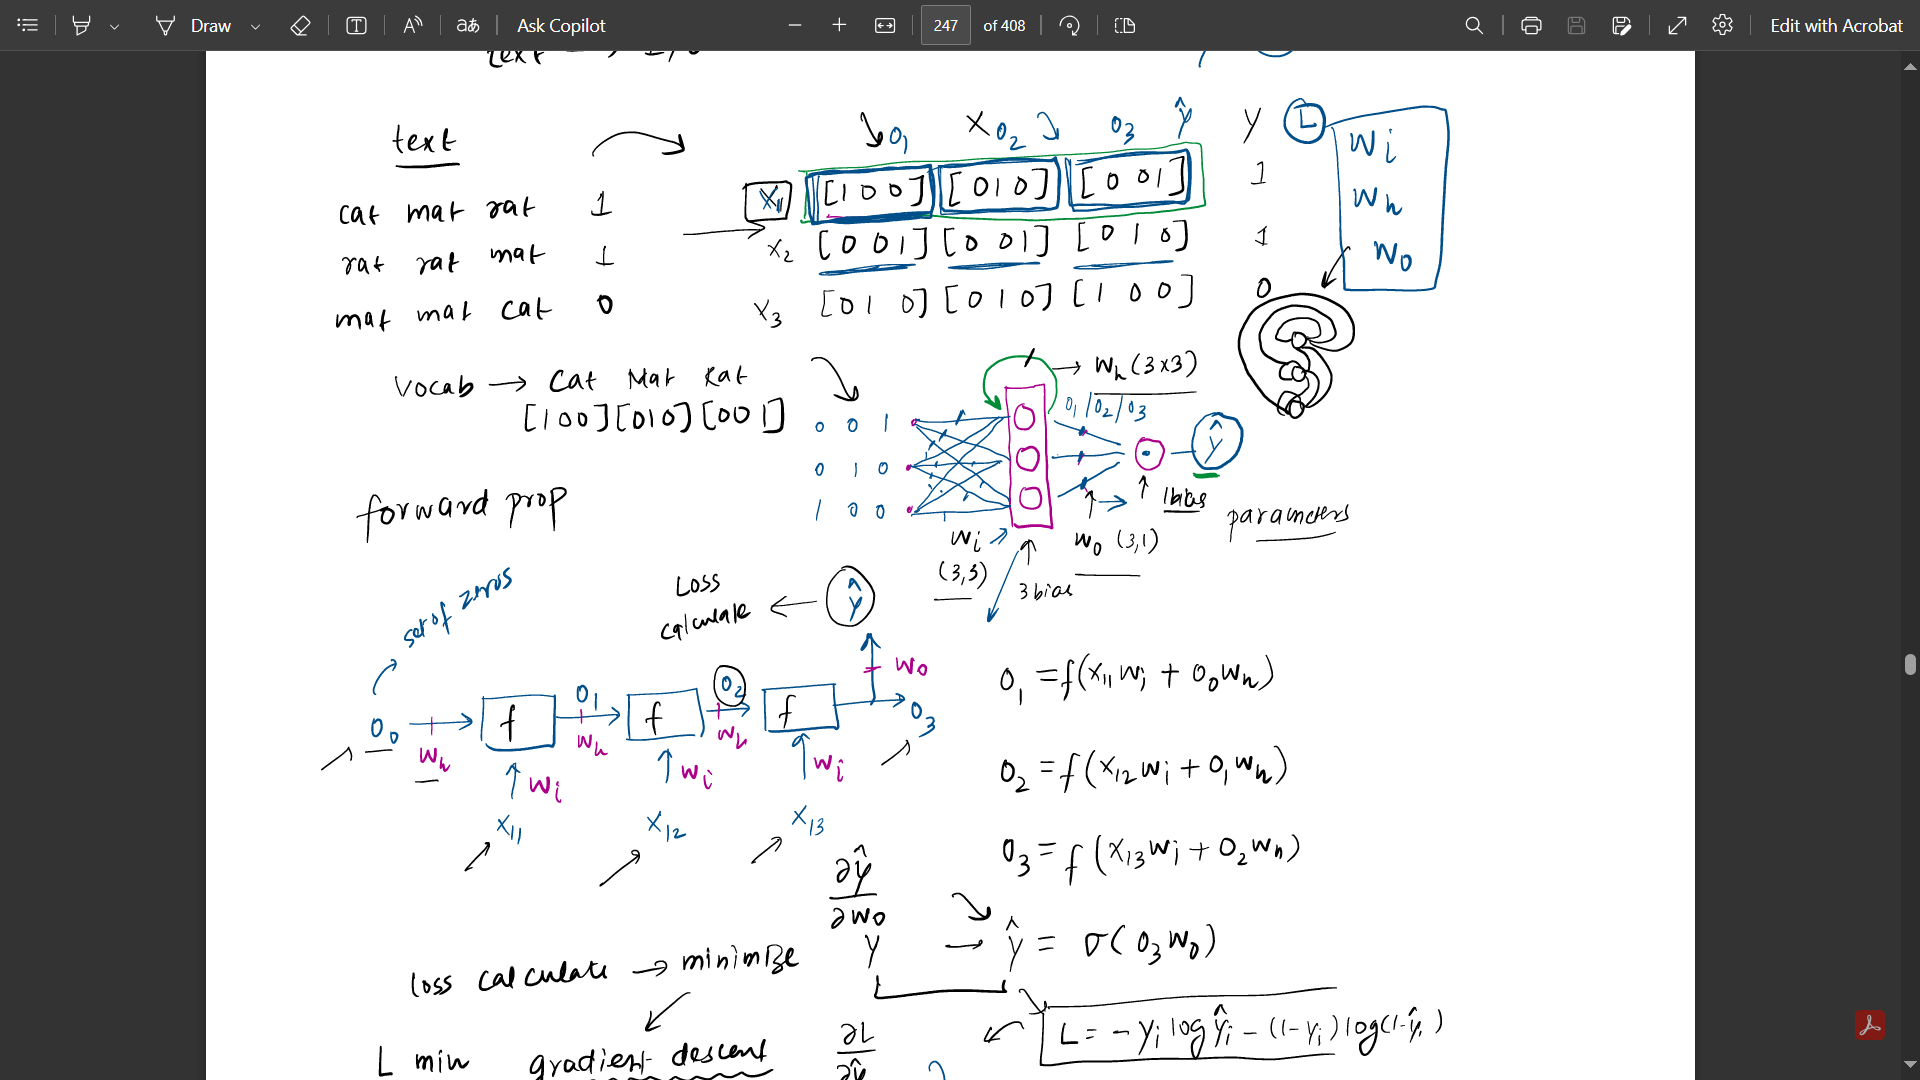

calculate loss L = -Yi logYi hat - (1-Yi) log(1-Yi hat)

we need to minimize the loss and the way to minimize is gradient descent.

Find the parametrics(weight and bias) value whose give L minimum

Wi= Wi - lr (dL/dWi)

Wh= Wh - lr (dL/dWh)

Wo= Wo - lr (dL/dWo)

Now, we need to calculate the derivates: (dL/dWi), (dL/dWh), (dL/dWo)

We need to find (dL/dWo) first because it is near the output and in backpropagation we need to start from backward.

L depend on Yhat because Y is constant.

Y hat is calculated by:

Yhat = sigmoid(O3W0)

O1 = f(Xi1Wi + O0Wh)

O2 = f(Xi2Wi + O1Wh)

O3 = f(Xi3Wi + O2Wh)

Yhat is depend on O3 and W0

(dL/dWo) = dL/dYhat . dYhat/dWo

do the difference putting value of L and Yhat.solve this.


Next, dL/dWi. similary L depend on Yhat and Yhat depend on O3 and Wo. O3 depend on Xi3, Wi, O2 and Wh. O2 depend Xi1, Wi, O1 and Wh. O1 is depend on Xi1, Wi, O0 and Wh.

dL/dWi = (dL/dYhat . dYhat/dO3 . dO3/dWi) + (dL/dYhat . dYhat/dO3 . dO3/d02 . dO2/dWi) + (dL/dYhat . dYhat/dO3 . dO3/d02 . dO2/dO1 . dO1/dWi)

there is 3 terms because RNN unfold time(t=3) is 3 times. It t=3 because it has 3 vocab in one row. For exampleif it has 12 vocab then it will have t =12 and has 12 terms.

dL/dWi = E j-1 to 3 dL.dYhat . dYhat/dOj . dOj/dWi

j =1 then dL/dYhat . dYhat/dO1 . dO1/dWi

j =1 give (dL/dYhat . dYhat/dO3 . dO3/d02 . dO2/dO1 . dO1/dWi)


j=2 then dL/dYhat . dYhat/dO2 . dO2/dWi

j=2 give (dL/dYhat . dYhat/dO3 . dO3/d02 . dO2/dWi)

j=3 then (dL/dYhat . dYhat/dO3 . dO3/dWi)

this mean:

dL/dWi = E j-1 to 3 dL.dYhat . dYhat/dOj . dOj/dWi

=(dL/dYhat . dYhat/dO3 . dO3/dWi) + (dL/dYhat . dYhat/dO3 . dO3/d02 . dO2/dWi) + (dL/dYhat . dYhat/dO3 . dO3/d02 . dO2/dO1 . dO1/dWi)


this means have formula:

dL/dWi = E j=1 to n dL.dYhat . dYhat/dOj . dOj/dWi, where n is timesteps

Now, dL/dWh. similary L depend on Yhat and Yhat depend on O3 and Wo. O3 depend on Xi3, Wi, O2 and Wh.O2 depend Xi1, Wi, O1 and Wh. O1 is depend on Xi1, Wi, O0 and Wh.

dL/dWh = dL/dYhat . dYhat/dO3 . dO3/dWh +(dL/dYhat . dYhat/dO3 . dO3/d02 . dO2/dWh) + (dL/dYhat . dYhat/dO3 . dO3/d02 . dO2/dO1 . dO1/dWh)

dL/dWh = E j=1 to n dL.dYhat . dYhat/dOj . dOj/dWh, where n is timesteps

# Problem with RNN

RNN suffer from 2 major problems:
1. Problem of long term dependency
2. Unstable training

both problem come from unstable gradients

## Problem of long term dependency



In RNN we have sequencial data where each data depend on previous data. If the sequence become big that means number of timesteps become bigger then the front data won't remember very old data. This is problem of long term dependency.

For example: next word predictor app. Nepali people speak ____. In the gap it predict Nepali which is correct. Since it doesnot need to remember for long timesteps.

But, If the i had paragraph. Ram love playing football. He always play whenver he have free time. Ram has his own ____ . The answer need to be football. But RNN won't able to predict because it was long dependency. It doesnot remember very long old data.

This problem rise from Vanishing Gradient Problem.

for t=3, we have

dL/dWi = short'(dL/dYhat . dYhat/dO3 . dO3/dWi)' + (dL/dYhat . dYhat/dO3 . dO3/d02 . dO2/dWi) + long'(dL/dYhat . dYhat/dO3 . dO3/d02 . dO2/dO1 . dO1/dWi)'

what if t=100 then:

dL/dWi= long'dL/dYhat . dYhat/dO100 . dO100/dO99 . ........ dO1/dWi'

the long term dependency become so small when we calculate the gradient.So, to calculate the dL/dWi gradient depend on short term. Long term has very less contribution

'dL/dYhat . dYhat/dO100 . dO100/dO99 . ........ dO1/dWi' this can be written as:

dL/dYhat . dYhat/dO100 π t=2 to 100 (dOt/dO t-1) dO1/dWi

π t=2 to 100 (dOt/dO t-1) = (dO100/dO99). (dO99/dO98).(dO98/dO97)........(dO2/dO1)

we have (dOt/dO t-1) if O1 activation function is tanh then 01= tanh(Xi1Wi + O0Wh)

then Ot =  tanh(XitWi + Ot-1 Wh)

then (dOt/dO t-1) = tanh`(XitWi + Ot-1 Wh) * Wh

tanh give value betweeen 0 to 1 and if we say Wh is between 0-1 then it will be close to 0 . that means it is very very small number. So, it will have minimal impact

Now, this is:

dL/dYhat . dYhat/dO100 π t=2 to 100 (tanh`(XitWi + Ot-1 Wh) * Wh) dO1/dWi

This whole will have minimal impact. So, if long term dependency is small then the short term has more dependency. That means output is more dependened on recent term.

this is VGP.





**Solution:**

1. Use different activation function than tanh. Use relu/leaky relu
2. Better weights init: make 1 or create identity matrix
3. skip RNNs
4. use LSTM

##Unstable training


In RNN, we have problem of unstable training because of exploding gradient problem.

Long term dependency has become so much big that it start to dominate short term dependency.Long term dependency may become infinte and it become infinte means weight become inifnte also.

- When for example we use relu as activation. relu derivate is any positive and weight is 1. So, each time we multiple it will become more and more bigger. and long term will blow-up.

- when lr is big


**solution**

1. Gradient Clipping: make a limitation of max of gradient.
2. Controlled learning rate:
3. use LSTM

# LSTM